In [87]:
from tokenize import group

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [88]:
data = {
    'College level' : [1, 2, 5, 1, 4, 3, 2, 1, 5, 2, 3, 4, 1, 2,
                   5, 4, 3, 1, 4, 5, 2, 5, 3, 4, 3, 2, 5, 1],
    'Marital status' : [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
                        1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0] # 1 - małżeństwo, 0 - wolny
}

In [89]:
data_df = pd.DataFrame(data)
print(data_df)

    College level  Marital status
0               1               0
1               2               0
2               5               1
3               1               0
4               4               1
5               3               0
6               2               1
7               1               0
8               5               1
9               2               0
10              3               1
11              4               1
12              1               0
13              2               0
14              5               1
15              4               1
16              3               1
17              1               1
18              4               1
19              5               0
20              2               0
21              5               1
22              3               0
23              4               0
24              3               1
25              2               0
26              5               1
27              1               0


In [90]:
# linear_model = LinearRegression()
# linear_model.fit(data_df['College level'], data_df['Marital status'])
# print(linear_model)
# # Wyświetlenie współczynników modelu
# print(f"Intercept (𝛽0): {linear_model.intercept_[0]}")
# print(f"Coefficient (𝛽1): {linear_model.coef_[0][0]}")


In [91]:
# # Predykcje na podstawie modelu
# x_vals = data_df['College level'].to_numpy().reshape(-1, 1)
# y_pred = linear_model.predict(x_vals)
# 
# # Wykres punktowy z linią regresji
# plt.scatter(data_df['College level'], data_df['Marital status'], label="Dane rzeczywiste")
# plt.plot(data_df['College level'], y_pred, color='red', label="Linia regresji")
# plt.xlabel("Rok studiów")
# plt.ylabel("Prawdopodobieństwo (stan cywilny)")
# plt.title("Liniowy model prawdopodobieństwa: Rok studiów vs Stan cywilny")
# plt.legend()
# plt.show()


# MODEL LOGITOWY - OGÓLNIEJSZA WERSJA

Logistic regression bounds output to 0 and 1 and the output of it is the probabilities of a specific class and these probabilities can be converted into class predictions


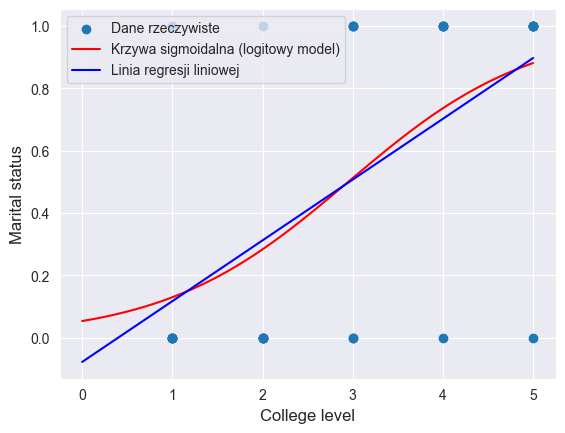

In [92]:
# Przygotowanie danych
X = data_df['College level'].values.reshape(-1, 1)
y = data_df['Marital status']

# Tworzenie modelu regresji logistycznej
logit_model = LogisticRegression(C=1000)
logit_model.fit(X, y)

# Tworzenie modelu regresji liniowej
linear_model = LinearRegression()
linear_model.fit(X, y)

# Przewidywanie prawdopodobieństw dla klasy 1 w regresji logistycznej
example_df = pd.DataFrame(data = {'College level': data_df['College level'].values, 'Marital status': data_df['Marital status'].values})
example_df['logistic_preds'] = logit_model.predict_proba(X)[:, 1]

# Aby uzyskać wygładzenie, tworzę wartości X w szerokim zakresie
X_range = np.linspace(0, 5, 300).reshape(-1, 1)  # Rozszerzenie zakresu X

# Przewidywanie prawdopodobieństw na nowym zakresie w regresji logistycznej
y_range_logit = logit_model.predict_proba(X_range)[:, 1]

# Przewidywanie wartości na podstawie regresji liniowej
y_range_linear = linear_model.predict(X_range)

# Wykres
plt.scatter(example_df['College level'], example_df['Marital status'], label='Dane rzeczywiste')
plt.plot(X_range, y_range_logit, color='red', label='Krzywa sigmoidalna (logitowy model)')
plt.plot(X_range, y_range_linear, color='blue', label='Linia regresji liniowej')

# Oznaczenia osi
plt.ylabel('Marital status', fontsize=12)
plt.xlabel('College level', fontsize=12)
plt.legend()
plt.show()


# MODEL LOGITOWY - WERSJA DOKŁADNIEJSZA

C:\Users\iskow\PycharmProjects\MedTestyIS\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


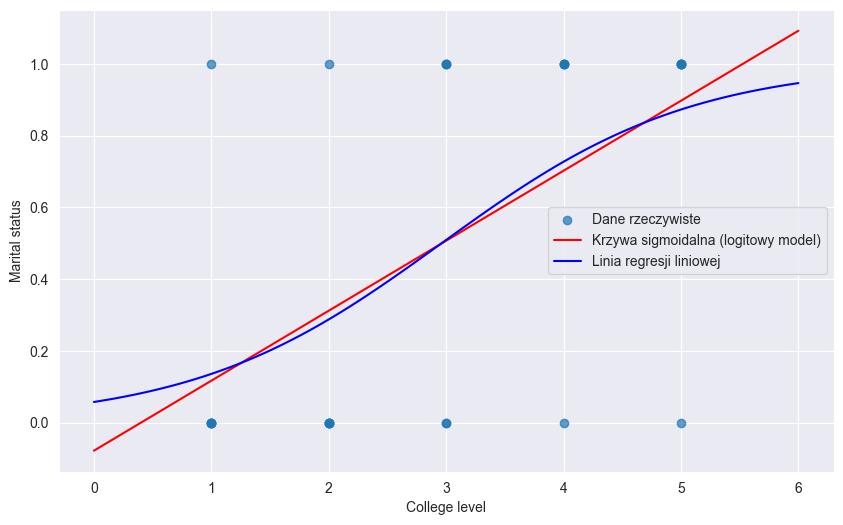

In [98]:
def calculate_logit(data):
    grouped = data.groupby('College level')['Marital status'].agg(
        numberOfStudents = 'count',
        married = 'sum'
    ).reset_index()
    
    grouped['p'] = grouped['married'] / grouped['numberOfStudents']
    grouped['logit'] = np.log(grouped['p'] / (1 - grouped['p']))
    return grouped

#przygotowywanie danych logitowych:
logit_data = calculate_logit(data_df)

linear_model = LinearRegression()
linear_model.fit(data_df[['College level']], data_df['Marital status'])

#dopasowanie modelu logitowego:
logit_model = LinearRegression()
logit_model.fit(logit_data[['College level']], logit_data[['logit']])

#zakres predykcji:
X_range = np.linspace(data_df['College level'].min() - 1, data_df['College level'].max() + 1, 100).reshape(-1, 1)
linear_predicts = linear_model.predict(X_range)

#p-ństwa dla modelu logitowego
beta0 = logit_model.intercept_[0]
beta1 = logit_model.coef_[0][0]
logit_predicts = 1 / (1 + np.exp(-(beta0 + beta1 * X_range))) #sigmoid func

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(data_df['College level'], data_df['Marital status'], label='Dane rzeczywiste', alpha=0.7)
plt.plot(X_range, linear_predicts, color='red', label='Krzywa sigmoidalna (logitowy model)')
plt.plot(X_range, logit_predicts, color='blue', label='Linia regresji liniowej')

# Oznaczenia osi
plt.ylabel('Marital status')
plt.xlabel('College level')
plt.legend()
plt.show()